In [321]:
!pip install countryinfo
!pip install missingno
import pandas as pd
import numpy as np
import missingno as msno

import re
import math


from countryinfo import CountryInfo

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 16)

In [311]:
conda install opencv 

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\pinil\anaconda3

  added / updated specs:
    - opencv


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libopencv-4.0.1            |       hbb9e17c_0        28.6 MB
    opencv-4.0.1               |   py38h2a7c758_0          22 KB
    py-opencv-4.0.1            |   py38he44ac1e_0         1.5 MB
    ------------------------------------------------------------
                                           Total:        30.1 MB

The following NEW packages will be INSTALLED:

  libopencv          pkgs/main/win-64::libopencv-4.0.1-hbb9e17c_0
  opencv             pkgs/main/win-64::opencv-4.0.1-py38h2a7c758_0
  py-opencv          pkgs/main/win-64::py-opencv-4.0.1-py38he44ac1e_0




libopencv-4.0.1      | 28.6 MB   |            |   0% 
libopencv-4.0.1      | 28.6 MB   |            |   0% 
libopencv-4.0.1  

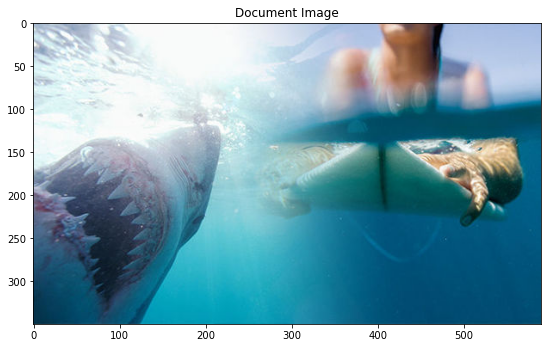

In [319]:
import cv2
binary = cv2.imread('Image1 surfer.jpg')
binary.shape
plt.figure(figsize=[20,20])
plt.imshow(binary[:,:,::-1])
plt.title("Surfer")
plt.subplot(122)
plt.imshow(binary[:,:,::-1])
plt.title("Document Image")
plt.show()

In [322]:
db = pd.read_csv('attacks.csv', encoding='cp1252')
len(db)

25723

In [323]:
#First visualitations in order to check which columns are usefull
db.head(1)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN


In [324]:
#checking null data, how many empty cells there are in every column.
null_cols = db.isnull().sum()
null_cols

Case Number       17021
Date              19421
Year              19423
Type              19425
Country           19471
                  ...  
Case Number.1     19421
Case Number.2     19421
original order    19414
Unnamed: 22       25722
Unnamed: 23       25721
Length: 24, dtype: int64

In [325]:
#show columns of db that have NaN values
def null_cols(db):
    nulls = db.isna().sum()
    return nulls[nulls > 0] / len(db) * 100
null_cols(db)

Case Number       66.170353
Date              75.500525
Year              75.508300
Type              75.516075
Country           75.694903
                    ...    
Case Number.1     75.500525
Case Number.2     75.500525
original order    75.473312
Unnamed: 22       99.996112
Unnamed: 23       99.992225
Length: 24, dtype: float64

In [326]:
#Delete blank spaces on the name of the columns
db.columns = db.columns.str.rstrip()

In [327]:
#We will drop Unmamed:22, only contain 'Teramo' & 'change filename'

In [328]:
#Unnamed: 22" and "Unnamed: 23" are mostly empty. Let's examine what they contain
db['Unnamed: 22'].fillna(0, inplace=True)
[x for x in db['Unnamed: 22'] if x!=0]

['stopped here']

In [329]:
#We will drop Unmamed:22, only contain 'stopped here'

In [330]:
db['Unnamed: 23'].fillna(0, inplace=True)
[y for y in db['Unnamed: 23'] if y!=0]

['Teramo', 'change filename']

In [331]:
#Column "Case Number.2" could be a duplicate of "Case Number" and "Case Number .1" 
db['Case Number.1'].isin(db['Case Number.2']).value_counts()

True     25704
False       19
Name: Case Number.1, dtype: int64

In [332]:
db['Case Number.1'].isin(db['Case Number']).value_counts()

True     25700
False       23
Name: Case Number.1, dtype: int64

We'll delete this Case Number.1 and Case Number.2

In [265]:
db.drop(columns = ["Unnamed: 22", "Unnamed: 23"], inplace = True)

In [266]:
#‘all’ : If all values are NA, drop that row or column.
db = db.dropna(how='all')
len(db)

8703

In [267]:
db.reset_index(drop=True)
db.head(1)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0


In [333]:
#db = db.dropna() dropea todo si algún valor es NaN

Let's have a look to Age and Sex columns

In [269]:
print(db['Age'].dtypes)

object


In [270]:
#Delete blank spaces of the names
db['Age']= db['Age'].str.strip()

In [271]:
NaN_rows_Age=db["Age"].isna().sum()
print('NaN rows Age:')
print(NaN_rows_Age)
null_rows_Age = db['Age'].isnull().sum()
print(null_rows_Age)

NaN rows Age:
0
0


In [272]:
print(pd.to_numeric(db['Age'], errors='coerce').isnull().value_counts())

False    1403
True       19
Name: Age, dtype: int64


Replace first wrong values/Age demographic rages:
Under 12 years old
12-17 years old
18-24 years old
25-34 years old
35-44 years old
45-54 years old
55-64 years old
65-74 years old
75 years or older

In [273]:
db['Age']=db['Age'].replace(['9 months', '9 or 10','8 or 10','Both 11','10 or 12',  '9 & 12', '18 months', '7 or 8',  '2½', '2 to 3 months','6½',], '0 - Under 12 years old')
db['Age']=db['Age'].replace(['12 or 13','teen','"young"','young',  '?    &   14', '12-17 years old','13 or 14', '13 or 18', '16 to 18', '17 & 16', 'Teen', 'Teens'], '1 - 12-17 years old' )
db['Age']=db['Age'].replace(['mid-20s','23 & 26', '17 & 35', '18 or 20', '18 to 22', '20?', '20s', '21 & ?'], '2 - 18-24 years old')
db['Age']=db['Age'].replace(['23 & 20','21 or 26','30 or 36','mid-30s','28 & 26', '30s', '30 & 32', '31 or 33', '32 & 30', '(adult)', 'adult','25 or 28', '25 to 35', '28 &26', '28, 23 & 30', ], '3 - 25-34 years old')
db['Age']=db['Age'].replace(['Ca. 33', '33 & 37', '33 or 37', '33 & 26', '40s'], '4 - 35-44 years old')
db['Age']=db['Age'].replace(['>50','"middle-age"','50s'], '5 - 45-54 years old')
db['Age']=db['Age'].replace(['60s', "60's"], '6 - 55-64 years old')
db['Age']=db['Age'].replace(['Elderly'], '8 - 75 years or older')
db['Age']=db['Age'].replace(['21, 34,24 & 35','36 & 23','36 & 26','? & 19', '7      &    31','34 & 19','37, 67, 35, 27,  ? & 27', '46 & 34','50 & 30'], 'Different ages')

In [274]:
db['Age'] = db['Age'].str.replace('X', 'U')
db['Age'] = db['Age'].str.replace('\xa0', 'U')
db['Age'] = db['Age'].str.replace('MAKE LINE GREEN', 'U')
db['Age'] = db['Age'].str.replace('F', 'U')
db['Age'] = db['Age'].str.replace('A.M.', 'U')

In [275]:
db['Age']=db['Age'].replace(['1','2','3','4','5','6','7','8','9','10','11'], '0 - Under 12 years old')
db['Age']=db['Age'].replace(['12','13','14','15','16','17'], '1 - 12-17 years old')
db['Age']=db['Age'].replace(['18','19','20','21','22','23','24'], '2 - 18-24 years old')
db['Age']=db['Age'].replace(['25','26','27','28','29','30','31','32','33','34'], '3 - 25-34 years old')
db['Age']=db['Age'].replace(['35','36','37','38','39','40','41','42','43','44'], '4 - 35-44 years old')
db['Age']=db['Age'].replace(['45','46','47','48','49','50','51','52','53','54'], '5 - 45-54 years old')
db['Age']=db['Age'].replace(['55','56','57','58','59','60','61','62','63','64'], '6 - 55-64 years old')
db['Age']=db['Age'].replace(['65','66','67','68','69','70','71','72','73','74'], '7 - 65-74 years old')
db['Age']=db['Age'].replace(['75','76','77','78','79','80','81','82','83','84','85','86','87','88','89','90','91','92','93','94'], '8 - 75 years or older')

In [276]:
#db['Age'] = db['Age'].fillna('U')

In [277]:
#Print set of different values
set(db['Age'])

{'',
 '0 - Under 12 years old',
 '1 - 12-17 years old',
 '2 - 18-24 years old',
 '3 - 25-34 years old',
 '4 - 35-44 years old',
 '5 - 45-54 years old',
 '6 - 55-64 years old',
 '7 - 65-74 years old',
 '8 - 75 years or older'}

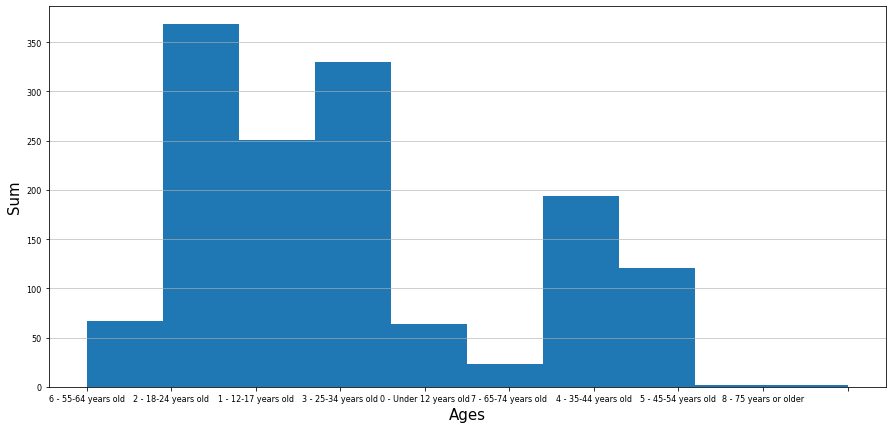

In [308]:
plt.figure(figsize=[15,7])
plt.hist(db['Age'])
plt.xticks(fontsize=8) 
plt.yticks(fontsize=8)
plt.xlabel('Ages',fontsize=15)
plt.ylabel('Sum',fontsize=15)
plt.grid(axis='y', alpha=0.75)

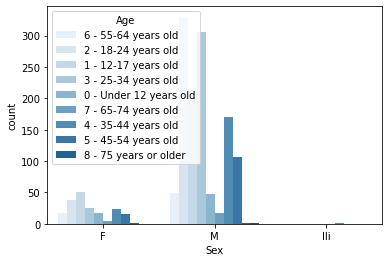

In [279]:
sns.countplot(x=db.Sex,
              hue=db.Age,
              palette="Blues")

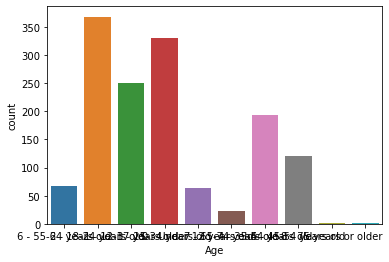

In [280]:
sns.countplot(x=db.Age)

In [281]:
null_rows_Sex = db['Sex'].isnull().sum()
print(null_rows_Sex)

0


In [282]:
#Print set of different values
set(db['Sex'])

{'F', 'M', 'lli'}

In [283]:
db['Sex']= db['Sex'].str.strip()

In [284]:
set(db['Sex'])

{'F', 'M', 'lli'}

In [285]:
db['Sex']=db['Sex'].replace(['.', 'lli', 'N'], 'U')
db['Sex'] = db['Sex'].fillna('U')

In [286]:
set(db['Sex'])

{'F', 'M', 'U'}

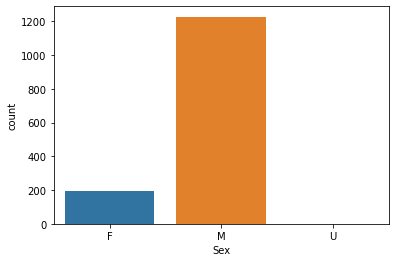

In [287]:
sns.countplot(x=db.Sex)

In [79]:
#Le's check what Data contains, could be important
set(db['Date'].sample(n=10))

{'02-Mar-1922',
 '03-Jan-2012',
 '08-Apr-2008',
 '17-Jul-2007',
 '20-Mar-2007',
 '22-Mar-1918',
 '23-May-2014',
 '27-Jun-2005',
 '28-Nov-1963',
 '29-Aug-2003'}

In [80]:
#The to_datetime method tries to convert values to a datetime type
print(pd.to_datetime(db['Date'], errors='coerce').isnull().value_counts())

False    1674
True       25
Name: Date, dtype: int64


In [81]:
#It seems that this column contain a lot of unique or empty values, we'll drop it
len(set(db['Date']))

1567

In [82]:
#Injury and Fatal are related.
#We can use both to fill the missing information of the other
db2=db[(db["Injury"].isna()== False) & (db["Fatal (Y/N)"].isna())][["Injury", "Fatal (Y/N)"]]

In [83]:
empty_rows_index = list(db[(db["Injury"].isna()== False) & (db["Fatal (Y/N)"].isna())].index)


In [84]:
db.to_csv("Injury_Fatal.csv")

In [85]:
#Name and Sex are correlated.
#We can use both to fill the missing information of the other
db3=db[(db["Name"].isna()== False) & (db["Sex"].isna())][["Name", "Sex"]]
len(db3)

0

In [86]:
print(db3)

Empty DataFrame
Columns: [Name, Sex]
Index: []


In [89]:
#We create a new datebase only with the columns are necessary. 
df = db[['Year','Type','Species', 'Country','Activity', 'Injury', 'Fatal (Y/N)','Sex', 'Age']]
df.head()

,Year,Type,Species,Country,Activity,Injury,Fatal (Y/N),Sex,Age
0,2018.0,Boating,White shark,USA,Paddling,"No injury to occupant, outrigger canoe and pad...",N,F,55-64 years old
6,2018.0,Unprovoked,Tiger shark,BRAZIL,Swimming,FATAL,Y,M,18-24 years old
8,2018.0,Unprovoked,"Bull shark, 6'",USA,Walking,Lower left leg bitten,N,M,12-17 years old
10,2018.0,Provoked,Grey reef shark,AUSTRALIA,Feeding sharks,Minor bite to hand by captive shark. PROVOKED ...,N,M,25-34 years old
13,2018.0,Invalid,Invalid incident,ENGLAND,Fishing,Injured by teeth of a dead porbeagle shark he ...,N,M,18-24 years old


In [90]:
#Check dupplicated values on the dataframe
df.duplicated().sum()

1

In [105]:
db.drop_duplicates()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,55-64 years old,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
6,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18-24 years old,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0
8,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,12-17 years old,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0
10,24-May-2018,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,male,M,25-34 years old,Minor bite to hand by captive shark. PROVOKED ...,N,Morning,Grey reef shark,"ABC.net.au ,05/24/2018",2018.05.24-CairnsAquarium.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.24,2018.05.24,6293.0
13,13-May-2018,2018.0,Invalid,ENGLAND,Cornwall,Off Land's End,Fishing,Max Berryman,M,18-24 years old,Injured by teeth of a dead porbeagle shark he ...,N,08h15,Invalid incident,"K. McMurray, TrackingSharks.com",2018.05.13.a-Berryman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.13.a,2018.05.13.a,6290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5814,25-Nov-1880,1880.0,Unprovoked,AUSTRALIA,Queensland,"Petrie Bight, Brisbane River",Swimming,Alexey Drury,M,12-17 years old,"Feet bitten, surgically amputated FATAL",Y,Afternoon,Bull shark,"Bucks County Gazette, 2/10/1881, Sunday Mail (...",1880.11.25-AlexeyDrury.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1880.11.25,1880.11.25,489.0
5922,13-May-1868,1868.0,Unprovoked,INDIA,Hoogly River,Ghat,Standing,male,M,35-44 years old,"FATAL, upper left thigh, groin & buttocks seve...",Y,Before 10h30,Identified as C. gangeticus by Dr. J. Fayrer,"J. Fayrer, M.D.",1868.05.13-Hindoo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1868.05.13,1868.05.13,381.0
6242,1960s,0.0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River,Swimming naked near a date palm where many dat...,male,M,Under 12 years old,Arm severed,N,Afternoon,Bull shark,B.W. Coad & L.A.J. Al-Hassan,ND-0064-Shatt-al-Arab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0064,ND.0064,61.0
6243,1960s,0.0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River near Abu al Khasib,Swimming in section of river used for washing ...,male,M,12-17 years old,Right leg lacerated & surgically amputated,N,Afternoon,Bull shark,B.W. Coad & L.A.J. Al-Hassan,ND-0063-Shatt-al-Arab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0063,ND.0063,60.0


In [91]:
set(df['Fatal (Y/N)'])

{' N', '2017', 'M', 'N', 'UNKNOWN', 'Y'}

In [92]:
#Let's clean this column
#str.strip() delete blank spaces at start at at the end
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.strip()

<ipython-input-92-9c170482cda7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.strip()


In [104]:
#UNKNOWN must be important, we'll keep it and rename the column ('Fatal (Y/N/U)')
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].fillna('U')
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace('n', 'N')
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace('N ', 'N')
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace(' N', 'N')
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace('#VALUE!', 'U')
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace('y', 'Y')
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace('UNKNOWN', 'U')
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace('2017', 'U')
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace('M', 'U')
df.rename(columns={'Fatal (Y/N)': 'Fatal (Y/N/U)'}, inplace=True)


<ipython-input-104-9b7de5ff373c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fatal (Y/N)'] = df['Fatal (Y/N)'].fillna('U')
<ipython-input-104-9b7de5ff373c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.replace('n', 'N')
<ipython-input-104-9b7de5ff373c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [93]:
set(df['Fatal (Y/N/U)'])

KeyError: 'Fatal (Y/N/U)'

In [106]:
df.isnull().sum()

Year             19423
Type             19425
Species          22259
Country          19471
Activity         19965
Injury           19449
Fatal (Y/N/U)        0
dtype: int64

In [94]:
set(df['Type'])

{'Boat',
 'Boating',
 'Invalid',
 'Provoked',
 'Questionable',
 'Sea Disaster',
 'Unprovoked'}

In [95]:
df['Type'] = df['Type'].fillna('Not confirmed')
df['Type'] = df['Type'].str.replace('Boating', 'Boat')
df['Type'] = df['Type'].str.replace('Boatomg', 'Boat')
df['Type'] = df['Type'].str.replace('Invalid', 'Not confirmed')
df['Type'] = df['Type'].str.replace('Questionable', 'Not confirmed')


<ipython-input-95-5ac45249bc11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = df['Type'].fillna('Not confirmed')
<ipython-input-95-5ac45249bc11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = df['Type'].str.replace('Boating', 'Boat')
<ipython-input-95-5ac45249bc11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [96]:
set(df['Type'])

{'Boat', 'Not confirmed', 'Provoked', 'Sea Disaster', 'Unprovoked'}

In [97]:
df.isnull().sum()

Year           0
Type           0
Species        0
Country        0
Activity       0
Injury         0
Fatal (Y/N)    0
Sex            0
Age            0
dtype: int64

In [98]:
#Rename columna Species, because it has a blank space a the end
df.rename({'Species ':'Species'}, axis=1, inplace=True)

C:\Users\pinil\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [99]:
set(df['Species'])

{' ',
 ' "gummy" shark (Rhizoprionodon or Loxodon) 1.2 m [4\']',
 " 1.5 m [5'] dusky shark",
 " 6' to 8' shark",
 " Blacktip shark, C. maculipinnis. 1.9 m to 2.1 m [6.5' to 7'] ",
 ' Bull shark, 2.5 m',
 " Bull shark, 5'",
 " Bull shark, 8'",
 ' Raggedtooth shark, 2m',
 " Sandbar shark, 3' to 4'",
 " Sevengill  shark, 1.2 m [4'] ",
 ' Tiger shark, 2.8m',
 " White shark, 7' ",
 ' Wobbegong shark, 1.6 to 1.8m ',
 " white shark, 15' ",
 '"A long thin brown-colored shark"',
 '"Shark had a very large girth"',
 '"a small shark"',
 '"a young shark"',
 '"juvenile shark"',
 '"reef shark"',
 '"sand shark"',
 '"sand" shark',
 '"small shark"',
 "+3' shark",
 "0.9 m  [3'] shark",
 "0.9 m  to 1.2 m [3' to 4'] shark",
 "0.9 m [3'] shark",
 "0.9 m [3'] shark,  probably a blacktip or spinner shark",
 "0.9 m to 1.2 m [3' to 4'] shark",
 "0.9 m to 1.2 m [3' to 4'] shark; Tooth fragment recovered from hand",
 "0.9 m to 1.2 m [3' to 4'] white shark",
 "0.9 m to 1.5 m [3' to 5'] shark",
 '1 m  shark',
 '1 m

In [100]:
df.columns

Index(['Year', 'Type', 'Species', 'Country', 'Activity', 'Injury',
       'Fatal (Y/N)', 'Sex', 'Age'],
      dtype='object')

In [101]:
#Columna not clean, let's create an additionally column to filter
df.insert(3,"Species_clean", "")

In [102]:
df.columns

Index(['Year', 'Type', 'Species', 'Species_clean', 'Country', 'Activity',
       'Injury', 'Fatal (Y/N)', 'Sex', 'Age'],
      dtype='object')

In [103]:
# como mostrar los unknow de type vara ver si se le puede asignar algo de activity



In [104]:
boolean_findings = df['Species'].str.contains('White')
boolean_findings

0        True
6       False
8       False
10      False
13      False
        ...  
5922    False
5970    False
6242    False
6243    False
6265    False
Name: Species, Length: 1699, dtype: bool

In [105]:
df2 = [lambda x: x
print(df2)
len(df2)

SyntaxError: invalid syntax (<ipython-input-105-88a78e9d06dd>, line 2)

In [106]:
set(df['Year'])
#como mostrar las filas que tienen un determinado valor )

{0.0,
 1862.0,
 1868.0,
 1871.0,
 1874.0,
 1877.0,
 1878.0,
 1880.0,
 1888.0,
 1889.0,
 1892.0,
 1894.0,
 1896.0,
 1897.0,
 1899.0,
 1901.0,
 1905.0,
 1906.0,
 1910.0,
 1912.0,
 1914.0,
 1916.0,
 1918.0,
 1919.0,
 1921.0,
 1922.0,
 1924.0,
 1925.0,
 1926.0,
 1927.0,
 1928.0,
 1929.0,
 1930.0,
 1931.0,
 1932.0,
 1934.0,
 1935.0,
 1936.0,
 1937.0,
 1938.0,
 1939.0,
 1940.0,
 1941.0,
 1942.0,
 1943.0,
 1944.0,
 1945.0,
 1946.0,
 1947.0,
 1948.0,
 1949.0,
 1950.0,
 1951.0,
 1952.0,
 1953.0,
 1954.0,
 1955.0,
 1956.0,
 1957.0,
 1958.0,
 1959.0,
 1960.0,
 1961.0,
 1962.0,
 1963.0,
 1964.0,
 1965.0,
 1966.0,
 1967.0,
 1968.0,
 1969.0,
 1970.0,
 1971.0,
 1972.0,
 1973.0,
 1974.0,
 1975.0,
 1976.0,
 1977.0,
 1978.0,
 1979.0,
 1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 201

In [26]:
df.describe(include = 'O').transpose()

,count,unique,top,freq
Type,25723,5,Not confirmed,19974
Species,3464,1549,White shark,163
Country,6252,212,USA,2229
Activity,5758,1532,Surfing,971
Injury,6274,3737,FATAL,802
Fatal (Y/N/U),25723,5,U,20033


In [28]:
#Clean names
for row in df['Country']:
    if isinstance(row, str):
        new_row = re.sub('\/.+|\(.+\)|\.|\?', '', row)
        new_row = re.sub('\&', 'and', new_row.strip().lower())
df['Country'].unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITE

In [84]:
empty_rows_Age = list(db[(db["Age"]].isna())

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (<ipython-input-84-e9c18aea5579>, line 1)

In [50]:
print(df.isnull())# Many null values

        Year   Type  Species   Country  Activity  Injury  Fatal (Y/N/U)
0      False  False     False    False     False   False          False
1      False  False      True    False     False   False          False
2      False  False      True    False     False   False          False
3      False  False     False    False     False   False          False
4      False  False     False    False     False   False          False
...      ...    ...       ...      ...       ...     ...            ...
25718   True   True      True     True      True    True          False
25719   True   True      True     True      True    True          False
25720   True   True      True     True      True    True          False
25721   True   True      True     True      True    True          False
25722   True   True      True     True      True    True          False

[25723 rows x 7 columns]


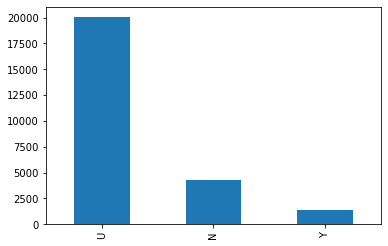

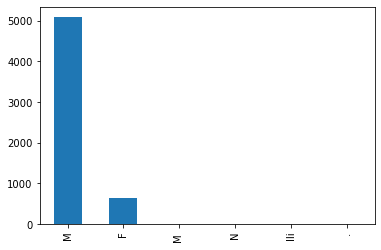

In [55]:
db.to_csv("attacks_fin.csv")